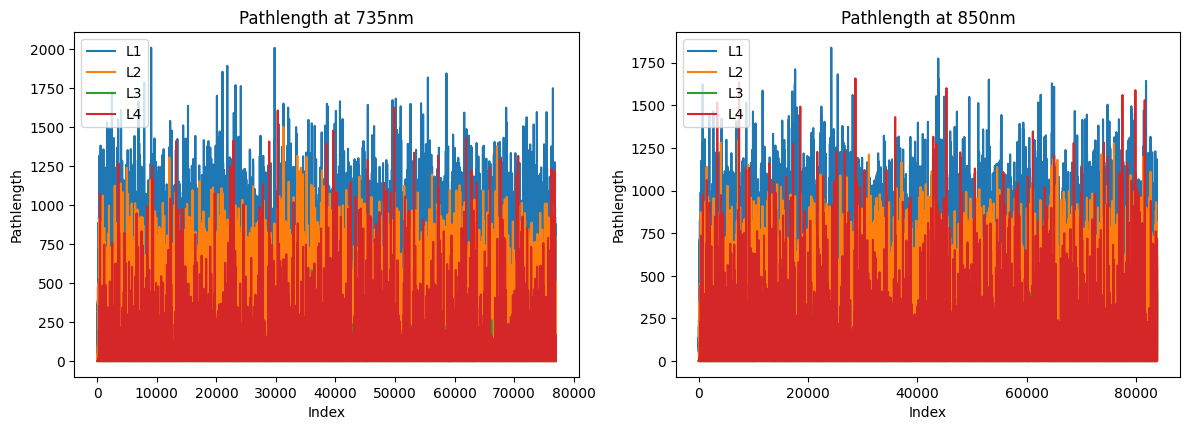

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 读取第一个文件(735nm)
file_path1 = "D:\\Codes\\CW_sheep\\CW_sheep\\735nm.csv"
data1 = np.loadtxt(file_path1, delimiter=',')

# 读取第二个文件(850nm)
file_path2 = "D:\\Codes\\CW_sheep\\CW_sheep\\850nm.csv"
data2 = np.loadtxt(file_path2, delimiter=',')

# 假设数据按列顺序排列
L1_735, L2_735, L3_735, L4_735 = data1[:, 0], data1[:, 1], data1[:, 2], data1[:, 3]
L1_850, L2_850, L3_850, L4_850 = data2[:, 0], data2[:, 1], data2[:, 2], data2[:, 3]

# 创建一个新的图形
plt.figure(figsize=(12, 8))

# 绘制第一个数据集(735nm)
plt.subplot(2, 2, 1)
plt.plot(L1_735, label='L1')
plt.plot(L2_735, label='L2')
plt.plot(L3_735, label='L3')
plt.plot(L4_735, label='L4')
plt.title('Pathlength at 735nm')
plt.xlabel('Index')
plt.ylabel('Pathlength')
plt.legend()

# 绘制第二个数据集(850nm)
plt.subplot(2, 2, 2)
plt.plot(L1_850, label='L1')
plt.plot(L2_850, label='L2')
plt.plot(L3_850, label='L3')
plt.plot(L4_850, label='L4')
plt.title('Pathlength at 850nm')
plt.xlabel('Index')
plt.ylabel('Pathlength')
plt.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

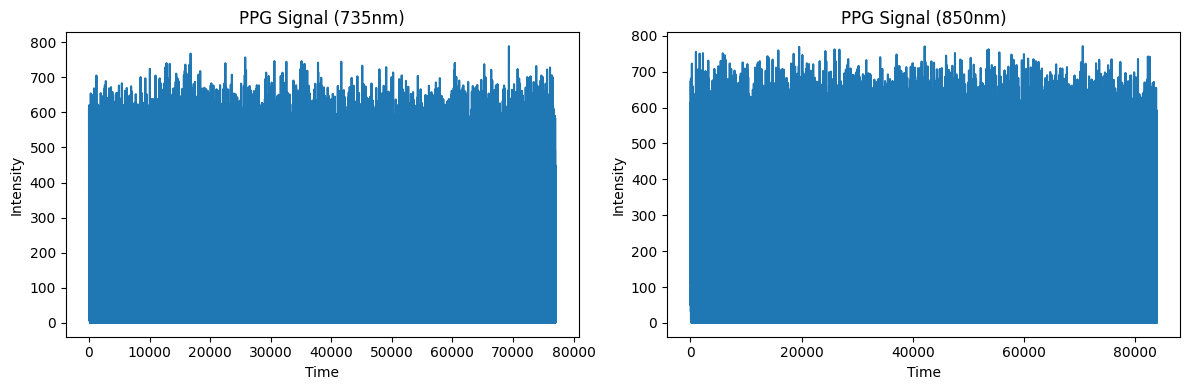

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq

def simulate_ppg(N, alpha_1, alpha_2, mu_3, alpha_4, L1, L2, L3, L4):
    I_t = []
    for t in range(len(L1)):
        I_n = []
        for _ in range(N):
            I_n.append(np.exp(-alpha_1 * L1[t]) * np.exp(-alpha_2 * L2[t]) * np.exp(-mu_3 * L3[t]) * np.exp(-alpha_4 * L4[t]))
        I_t.append(sum(I_n))
    return I_t

# 读取数据
file_path1 = "D:\\Codes\\CW_sheep\\CW_sheep\\735nm.csv"
data1 = np.loadtxt(file_path1, delimiter=',')
file_path2 = "D:\\Codes\\CW_sheep\\CW_sheep\\850nm.csv"
data2 = np.loadtxt(file_path2, delimiter=',')

L1_735, L2_735, L3_735, L4_735 = data1[:, 0], data1[:, 1], data1[:, 2], data1[:, 3]
L1_850, L2_850, L3_850, L4_850 = data2[:, 0], data2[:, 1], data2[:, 2], data2[:, 3]

# 设置模拟参数
N = 1000
alpha_1_735 = 0.009
alpha_2_735 = 0.01
mu_3_735 = 0.004
alpha_4_735 = 0.013

alpha_1_850 = 0.009
alpha_2_850 = 0.01
mu_3_850 = 0.004
alpha_4_850 = 0.013

fs = 80  # 采样频率

# 运行模拟
I_t_735 = simulate_ppg(N, alpha_1_735, alpha_2_735, mu_3_735, alpha_4_735, L1_735, L2_735, L3_735, L4_735)
I_t_850 = simulate_ppg(N, alpha_1_850, alpha_2_850, mu_3_850, alpha_4_850, L1_850, L2_850, L3_850, L4_850)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(I_t_735)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('PPG Signal (735nm)')

plt.subplot(1, 2, 2)
plt.plot(I_t_850)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('PPG Signal (850nm)')

plt.tight_layout()
plt.show()

Time domain result (735nm): 205.4602419819718
Frequency domain result (735nm): 0.009590219293471272
Time domain result (850nm): 180.65703184332116
Frequency domain result (850nm): 0.01089284555628509


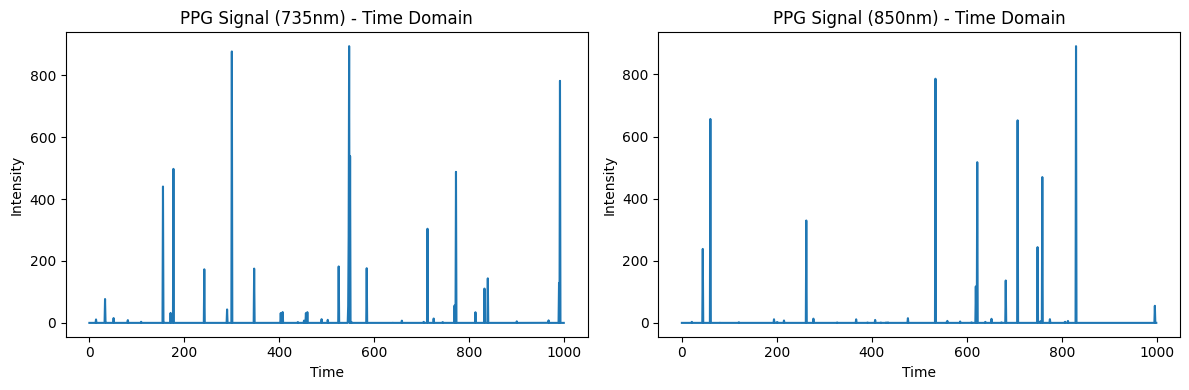

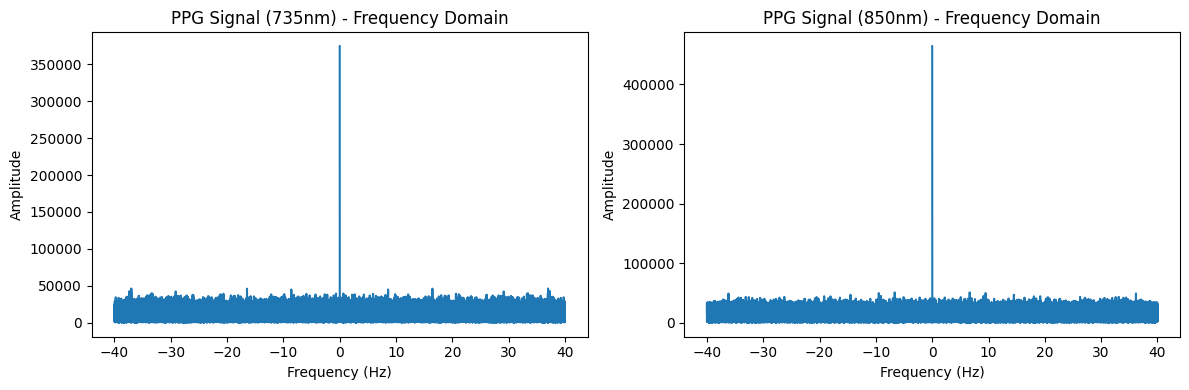

In [8]:
from scipy.fft import fft, ifft
def calc_time_domain(I_t):
    # 将信号转换到频域
    I_f = fft(I_t)
    

    I_dc_freq = I_f[0]
    

    I_dc_time = ifft([I_dc_freq] + [0] * (len(I_t) - 1)).real

    I_ac = I_t - I_dc_time
    
    I_ac_max = np.max(I_ac)
    I_ac_min = np.min(I_ac)
    I_ac_pp = I_ac_max - I_ac_min
    
    I_dc = np.mean(I_dc_time)
    
    return I_ac_pp / I_dc
def calc_freq_domain(I_t, fs):
    fft_vals = fft(I_t)
    freqs = fftfreq(len(I_t), 1/fs)
    f_MHR_idx = np.argmax(np.abs(fft_vals))
    f_MHR_energy = np.abs(fft_vals[f_MHR_idx]) ** 2
    total_energy = sum(np.abs(fft_vals) ** 2)
    return f_MHR_energy / total_energy

# 计算时域和频域结果
time_domain_result_735 = calc_time_domain(I_t_735)
freq_domain_result_735 = calc_freq_domain(I_t_735, fs)

time_domain_result_850 = calc_time_domain(I_t_850)
freq_domain_result_850 = calc_freq_domain(I_t_850, fs)

print(f"Time domain result (735nm): {time_domain_result_735}")
print(f"Frequency domain result (735nm): {freq_domain_result_735}")

print(f"Time domain result (850nm): {time_domain_result_850}")
print(f"Frequency domain result (850nm): {freq_domain_result_850}")

# 绘制时域PPG信号片段图
start_idx = 0
end_idx = 1000

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(I_t_735[start_idx:end_idx])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('PPG Signal (735nm) - Time Domain')

plt.subplot(1, 2, 2)
plt.plot(I_t_850[start_idx:end_idx])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('PPG Signal (850nm) - Time Domain')

plt.tight_layout()
plt.show()

# 绘制频域PPG信号图
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(freqs_735, np.abs(fft_vals_735))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PPG Signal (735nm) - Frequency Domain')

plt.subplot(1, 2, 2)
plt.plot(freqs_850, np.abs(fft_vals_850))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PPG Signal (850nm) - Frequency Domain')

plt.tight_layout()
plt.show()

Time domain result (735nm): 4.742102049666449
Frequency domain result (735nm): 0.5049551016348598
Time domain result (850nm): 4.037742135074228
Frequency domain result (850nm): 0.540651555354935


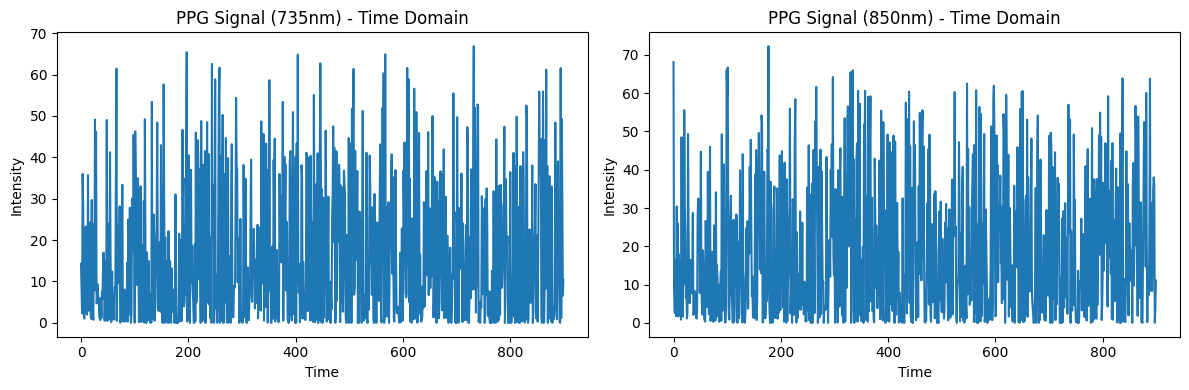

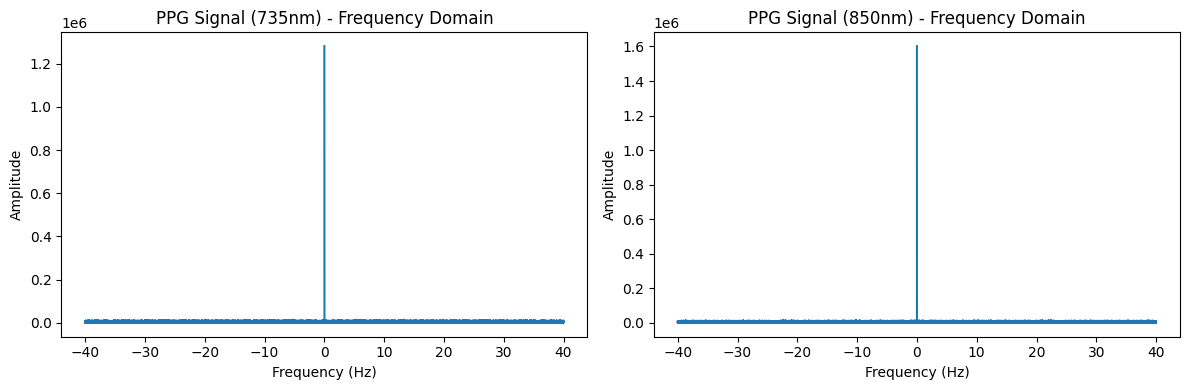

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

def simulate_ppg(N, alpha_1, alpha_2, mu_3, alpha_4, L1, L2, L3, L4):
    I_t = []
    for t in range(len(L1)):
        I_n = 0
        for _ in range(N):
            I_n += np.exp(-alpha_1[t] * L1[t]) * np.exp(-alpha_2[t] * L2[t]) * \
                   np.exp(-mu_3 * L3[t]) * np.exp(-alpha_4[t] * L4[t])
        I_t.append(I_n)
    return I_t

def calc_time_domain(I_t):
    # 计算DC分量
    I_dc = np.mean(I_t)
    
    # 计算AC分量
    I_ac = I_t - I_dc
    
    # 计算时域结果
    I_ac_max = np.max(I_ac)
    I_ac_min = np.min(I_ac)
    I_ac_pp = I_ac_max - I_ac_min
    
    return I_ac_pp / I_dc

def calc_freq_domain(I_t, fs):
    fft_vals = fft(I_t)
    freqs = fftfreq(len(I_t), 1/fs)
    f_MHR_idx = np.argmax(np.abs(fft_vals))
    f_MHR_energy = np.abs(fft_vals[f_MHR_idx]) ** 2
    total_energy = sum(np.abs(fft_vals) ** 2)
    return f_MHR_energy / total_energy

# 读取数据
file_path1 = "D:\\Codes\\CW_sheep\\CW_sheep\\735nm.csv"
data1 = np.loadtxt(file_path1, delimiter=',')
file_path2 = "D:\\Codes\\CW_sheep\\CW_sheep\\850nm.csv"
data2 = np.loadtxt(file_path2, delimiter=',')

L1_735, L2_735, L3_735, L4_735 = data1[:, 0], data1[:, 1], data1[:, 2], data1[:, 3]
L1_850, L2_850, L3_850, L4_850 = data2[:, 0], data2[:, 1], data2[:, 2], data2[:, 3]

# 设置模拟参数
N = 100
mu_3_735 = 0.004
mu_3_850 = 0.004
fs = 80  # 采样频率

# 初始吸收系数
alpha_1_735_init = np.full(len(L1_735), 0.009)
alpha_2_735_init = np.full(len(L2_735), 0.01)
alpha_4_735_init = np.full(len(L4_735), 0.013)
alpha_1_850_init = np.full(len(L1_850), 0.009)
alpha_2_850_init = np.full(len(L2_850), 0.01)
alpha_4_850_init = np.full(len(L4_850), 0.013)

# Simulation
I_t_735 = simulate_ppg(N, alpha_1_735_init, alpha_2_735_init, mu_3_735, alpha_4_735_init,
                       L1_735, L2_735, L3_735, L4_735)
I_t_850 = simulate_ppg(N, alpha_1_850_init, alpha_2_850_init, mu_3_850, alpha_4_850_init,
                       L1_850, L2_850, L3_850, L4_850)

# 计算时域和频域结果
time_domain_result_735 = calc_time_domain(I_t_735)
freq_domain_result_735 = calc_freq_domain(I_t_735, fs)
time_domain_result_850 = calc_time_domain(I_t_850)
freq_domain_result_850 = calc_freq_domain(I_t_850, fs)

print(f"Time domain result (735nm): {time_domain_result_735}")
print(f"Frequency domain result (735nm): {freq_domain_result_735}")
print(f"Time domain result (850nm): {time_domain_result_850}")
print(f"Frequency domain result (850nm): {freq_domain_result_850}")

# 绘制时域PPG信号片段图
start_idx = 100
end_idx = 1000

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(I_t_735[start_idx:end_idx])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('PPG Signal (735nm) - Time Domain')

plt.subplot(1, 2, 2)
plt.plot(I_t_850[start_idx:end_idx])
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('PPG Signal (850nm) - Time Domain')

plt.tight_layout()
plt.show()

# 绘制频域PPG信号图
plt.figure(figsize=(12, 4))
freqs_735 = fftfreq(len(I_t_735), 1/fs)
fft_vals_735 = fft(I_t_735)
plt.subplot(1, 2, 1)
plt.plot(freqs_735, np.abs(fft_vals_735))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PPG Signal (735nm) - Frequency Domain')

freqs_850 = fftfreq(len(I_t_850), 1/fs)
fft_vals_850 = fft(I_t_850)
plt.subplot(1, 2, 2)
plt.plot(freqs_850, np.abs(fft_vals_850))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PPG Signal (850nm) - Frequency Domain')

plt.tight_layout()
plt.show()

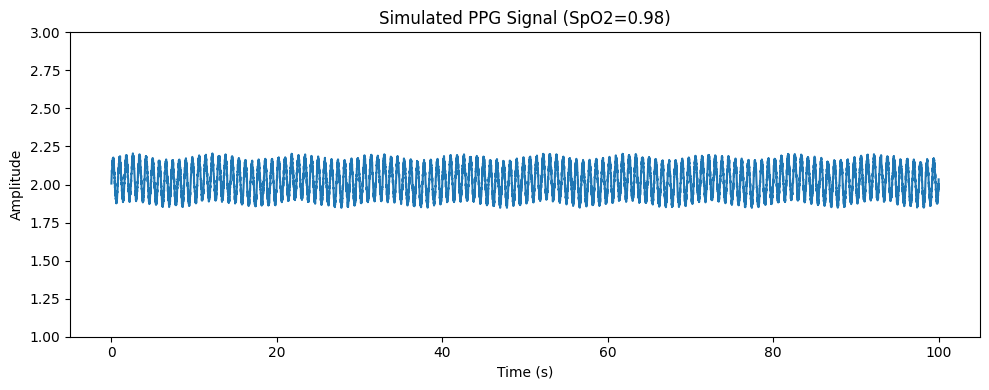

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set signal parameters
spo2 = 0.98
hr = 75   # Heart rate
fs = 100   # Sampling frequency of 100 Hz
duration = 100   # Duration of 100 seconds

# 生成时间序列
t = np.arange(0, duration, 1/fs)

# 生成基础PPG波形(简化为正弦波)
ppg_base = np.sin(2*np.pi*hr/60*t)

# 根据SpO2调整波形振幅
amp_ratio = 0.1 + 1.8 * (1 - spo2)
ppg_adj = amp_ratio * ppg_base

# 添加随机噪声和基线漂移
noise = 0.05 * np.random.rand(len(t))
baseline = 0.02 * np.sin(2*np.pi*0.1*t)
ppg_sim = ppg_adj + noise + baseline + 2

# 绘制模拟PPG信号图
plt.figure(figsize=(10, 4))
plt.plot(t, ppg_sim)
plt.title(f'Simulated PPG Signal (SpO2={spo2})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([1.0, 3.0])
plt.tight_layout()
plt.show()

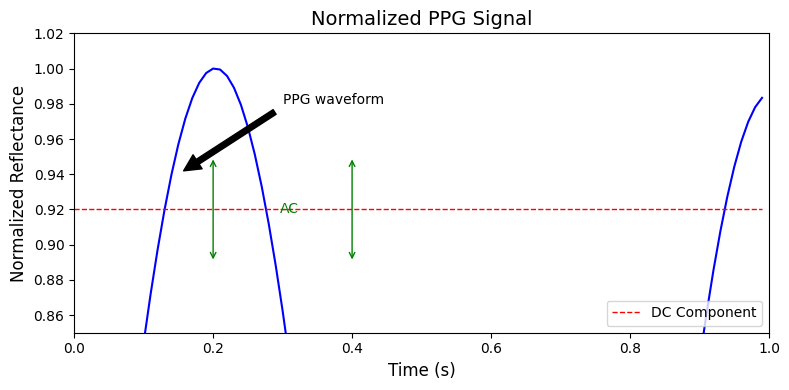

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 设定信号参数
hr = 75  # 心率75次/分
fs = 100  # 采样频率100Hz
duration = 1.0  # 信号时长1秒

# 生成时间序列
t = np.arange(0, duration, 1/fs)

# 生成PPG波形
ppg_base = np.sin(2*np.pi*hr/60*t)
ppg_ac = 0.06 * np.sin(2*np.pi*hr/60*t - 0.9*np.pi)
ppg_sim = ppg_base + ppg_ac

# 添加基线漂移
baseline = 0.92 + 0.015 * np.sin(2*np.pi*0.75*t)
ppg_sim = ppg_sim + baseline

# 归一化PPG信号
ppg_norm = (ppg_sim - np.min(ppg_sim)) / (np.max(ppg_sim) - np.min(ppg_sim))

# 绘制归一化PPG信号图
plt.figure(figsize=(8, 4))
plt.plot(t, ppg_norm, 'b')
plt.title('Normalized PPG Signal', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Normalized Reflectance', fontsize=12)
plt.ylim([0.85, 1.02])
plt.xlim([0, 1])

# 标记DC基线
dc_line = np.full(len(t), 0.92)
plt.plot(t, dc_line, 'r--', linewidth=1, label='DC Component')

# 添加图例
plt.legend(fontsize=10, loc='lower right')

# 添加PPG波形标注
plt.annotate('PPG waveform', xy=(0.15, 0.94), xytext=(0.3, 0.98), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

# 添加AC分量标注  
ac_height = 0.03
ac_start = 0.2
ac_end = ac_start + 0.2
plt.annotate('', xy=(ac_start, 0.92-ac_height), xytext=(ac_start, 0.92+ac_height),
             arrowprops=dict(arrowstyle='<->', color='green'))
plt.annotate('', xy=(ac_end, 0.92-ac_height), xytext=(ac_end, 0.92+ac_height),
             arrowprops=dict(arrowstyle='<->', color='green'))  
plt.text(ac_start+0.11, 0.92, 'AC', color='green', fontsize=10, va='center', ha='center')

# 显示图形
plt.tight_layout()
plt.show()

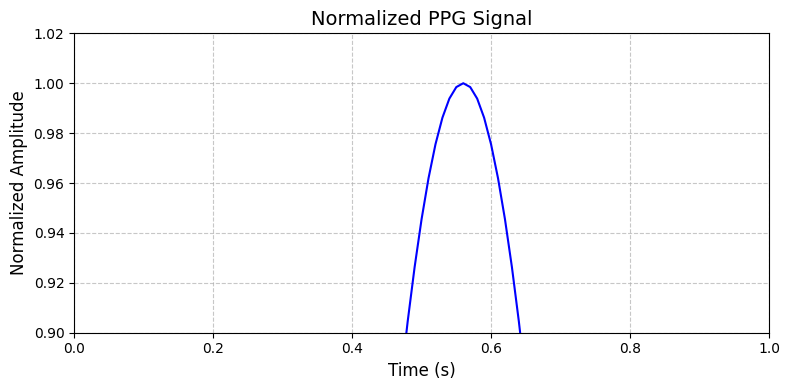

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 设定信号参数
hr = 75  # 心率75次/分
fs = 100  # 采样频率100Hz
duration = 1.0  # 信号时长1秒
ac_amplitude = 0.035  # AC分量振幅
dc_level = 0.93  # DC基线水平

# 生成时间序列
t = np.arange(0, duration, 1/fs)

# 生成PPG波形
ppg_base = np.sin(2*np.pi*hr/60*t)
ppg_ac = ac_amplitude * np.sin(2*np.pi*hr/60*t - 0.9*np.pi)
ppg_sim = dc_level + ppg_ac

# 归一化PPG信号
ppg_norm = (ppg_sim - np.min(ppg_sim)) / (np.max(ppg_sim) - np.min(ppg_sim))

# 绘制归一化PPG信号图
plt.figure(figsize=(8, 4))
plt.plot(t, ppg_norm, 'b')
plt.title('Normalized PPG Signal', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Normalized Amplitude', fontsize=12)
plt.ylim([0.9, 1.02])
plt.xlim([0, 1])
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
file_path1 = "D:\\Codes\\CW_sheep\\CW_sheep\\735nm.csv"
data1 = np.loadtxt(file_path1, delimiter=',')
file_path2 = "D:\\Codes\\CW_sheep\\CW_sheep\\850nm.csv"
data2 = np.loadtxt(file_path2, delimiter=',')
L1_735, L2_735, L3_735, L4_735 = data1[:, 0], data1[:, 1], data1[:, 2], data1[:, 3]
L1_850, L2_850, L3_850, L4_850 = data2[:, 0], data2[:, 1], data2[:, 2], data2[:, 3]

# 生成一个周期的PPG信号
hr = 75  # 心率75次/分
fs = 100  # 采样频率100Hz
duration = 1/hr  # 一个周期的时长
ac_amplitude = 0.035  # AC分量振幅  
dc_level = 0.93  # DC基线水平

t = np.arange(0, duration, 1/fs)
ppg_base = np.sin(2*np.pi*t/duration)
ppg_ac = ac_amplitude * np.sin(2*np.pi*t/duration - 0.9*np.pi)
ppg_sim = dc_level + ppg_ac
ppg_norm = (ppg_sim - np.min(ppg_sim)) / (np.max(ppg_sim) - np.min(ppg_sim))

# 设置Monte Carlo模拟参数
N = len(L1_735)  # 根据数据长度设置光子数量
mu_3_735 = 0.004
mu_3_850 = 0.004

# 设置初始吸收系数
alpha_1_735_init = np.full(N, 0.009)
alpha_2_735_init = np.full(N, 0.01)
alpha_4_735_init = np.full(N, 0.013)
alpha_1_850_init = np.full(N, 0.009)
alpha_2_850_init = np.full(N, 0.01)
alpha_4_850_init = np.full(N, 0.013)

# 根据PPG信号更新吸收系数
alpha_1_735 = alpha_1_735_init * (1 + 0.1 * ppg_norm[:, np.newaxis])
alpha_2_735 = alpha_2_735_init * (1 + 0.1 * ppg_norm[:, np.newaxis])
alpha_4_735 = alpha_4_735_init * (1 + 0.1 * ppg_norm[:, np.newaxis])
alpha_1_850 = alpha_1_850_init * (1 + 0.1 * ppg_norm[:, np.newaxis])
alpha_2_850 = alpha_2_850_init * (1 + 0.1 * ppg_norm[:, np.newaxis])
alpha_4_850 = alpha_4_850_init * (1 + 0.1 * ppg_norm[:, np.newaxis])

# 计算每个光路径的光强
I_n_735 = np.exp(-alpha_1_735 * L1_735) * \
          np.exp(-alpha_2_735 * L2_735) * \
          np.exp(-mu_3_735 * L3_735) * \
          np.exp(-alpha_4_735 * L4_735)

I_n_850 = np.exp(-alpha_1_850 * L1_850) * \
          np.exp(-alpha_2_850 * L2_850) * \
          np.exp(-mu_3_850 * L3_850) * \
          np.exp(-alpha_4_850 * L4_850)

# 计算总光强  
I_t_735 = np.sum(I_n_735, axis=1)
I_t_850 = np.sum(I_n_850, axis=1)

# 归一化总光强
I_t_735_norm = (I_t_735 - np.min(I_t_735)) / (np.max(I_t_735) - np.min(I_t_735))
I_t_850_norm = (I_t_850 - np.min(I_t_850)) / (np.max(I_t_850) - np.min(I_t_850))

# 绘制光强变化图
plt.figure(figsize=(8, 4))
plt.plot(t, I_t_735_norm, 'b', label='735 nm')
plt.plot(t, I_t_850_norm, 'r', label='850 nm')
plt.title('Light Intensity Changes in One Cycle', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Normalized Light Intensity', fontsize=12)
plt.xlim([0, duration])
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (2,76988) (83864,) 

In [32]:
import numpy as np

def analyze_intensity_ratio(L1_735, L2_735, L3_735, L4_735, L1_850, L2_850, L3_850, L4_850, alpha_1_init, alpha_2_init, alpha_4_init, mu_3_735, mu_3_850, ppg_norm_735, ppg_norm_850):
    """
    计算735nm和850nm波长下光强度的最大值和最小值比值
    
    参数:
    L1_735, L2_735, L3_735, L4_735: 735nm波长下光路长度数组
    L1_850, L2_850, L3_850, L4_850: 850nm波长下光路长度数组
    alpha_1_init, alpha_2_init, alpha_4_init: 初始吸收系数
    mu_3_735, mu_3_850: 蒙特卡罗模拟参数
    ppg_norm_735, ppg_norm_850: 归一化的PPG信号数组
    
    返回:
    max_ratio: 735nm和850nm波长下I(t)最大值的比值
    min_ratio: 735nm和850nm波长下I(t)最小值的比值
    """
    
    # 计算每条光路的吸收系数
    alpha_1_735 = alpha_1_init 
    alpha_2_735 = alpha_2_init 
    alpha_4_735 = alpha_4_init 
    alpha_1_850 = alpha_1_init 
    alpha_2_850 = alpha_2_init 
    alpha_4_850 = alpha_4_init
    
    # 计算每条光路和总光强度
    I_n_735 = np.exp(-alpha_1_735 * L1_735) * np.exp(-alpha_2_735 * L2_735) * np.exp(-mu_3_735 * L3_735) * np.exp(-alpha_4_735 * L4_735)
    I_n_850 = np.exp(-alpha_1_850 * L1_850) * np.exp(-alpha_2_850 * L2_850) * np.exp(-mu_3_850 * L3_850) * np.exp(-alpha_4_850 * L4_850)
    I_t_735 = np.sum(I_n_735)
    I_t_850 = np.sum(I_n_850)
    
    # 归一化总光强度
    I_t_735_norm = I_t_735 / np.max(I_t_735)
    I_t_850_norm = I_t_850 / np.max(I_t_850)
    
    # 计算最大值和最小值的比值
    max_ratio = np.max(I_t_735_norm) / np.max(I_t_850_norm)
    min_ratio = np.min(I_t_735_norm) / np.min(I_t_850_norm)
    
    return max_ratio, min_ratio

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
file_path1 = "D:\\Codes\\CW_sheep\\CW_sheep\\735nm.csv"
data1 = np.loadtxt(file_path1, delimiter=',')
file_path2 = "D:\\Codes\\CW_sheep\\CW_sheep\\850nm.csv"
data2 = np.loadtxt(file_path2, delimiter=',')
L1_735, L2_735, L3_735, L4_735 = data1[:, 0], data1[:, 1], data1[:, 2], data1[:, 3]
L1_850, L2_850, L3_850, L4_850 = data2[:, 0], data2[:, 1], data2[:, 2], data2[:, 3]

# 生成一个周期的PPG信号
hr = 75  # 心率75次/分
fs = 100  # 采样频率100Hz
duration = 1/hr  # 一个周期的时长
ac_amplitude = 0.035  # AC分量振幅  
dc_level = 0.93  # DC基线水平

t = np.arange(0, duration, 1/fs)
ppg_base = np.sin(2*np.pi*t/duration)
ppg_ac = ac_amplitude * np.sin(2*np.pi*t/duration - 0.9*np.pi)
ppg_sim = dc_level + ppg_ac
ppg_norm = (ppg_sim - np.min(ppg_sim)) / (np.max(ppg_sim) - np.min(ppg_sim))


# 设置其他参数
alpha_1_init = 0.009
alpha_2_init = 0.01
alpha_4_init = 0.013
mu_3_735 = 0.004
mu_3_850 = 0.004

# 调用分析函数
max_ratio, min_ratio = analyze_intensity_ratio(L1_735, L2_735, L3_735, L4_735, L1_850, L2_850, L3_850, L4_850, alpha_1_init, alpha_2_init, alpha_4_init, mu_3_735, mu_3_850, ppg_norm_735, ppg_norm_850)

# 输出结果
print(f"735nm I(t) 最大值与850nm I(t) 最大值的比值: {max_ratio:.4f}")
print(f"735nm I(t) 最小值与850nm I(t) 最小值的比值: {min_ratio:.4f}")

735nm I(t) 最大值与850nm I(t) 最大值的比值: 1.0000
735nm I(t) 最小值与850nm I(t) 最小值的比值: 1.0000


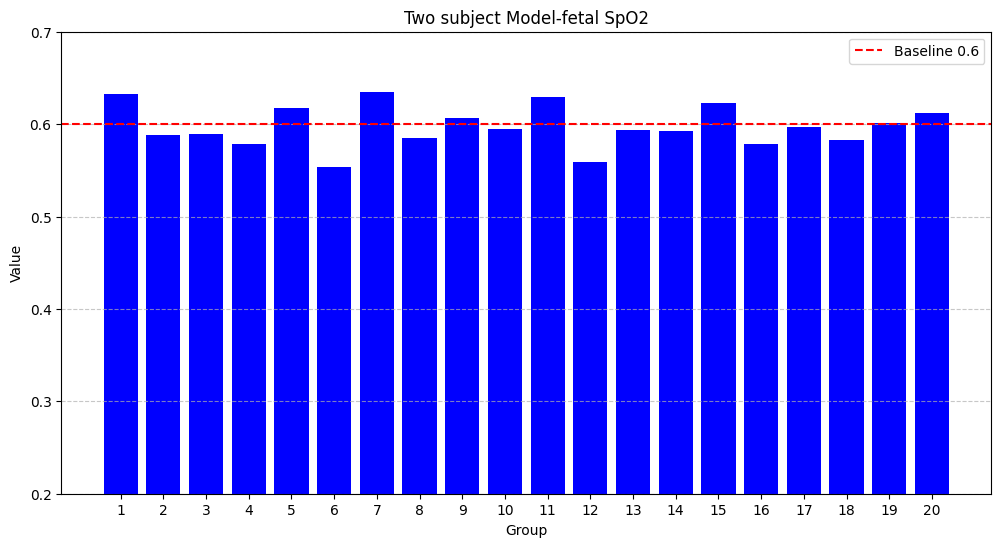

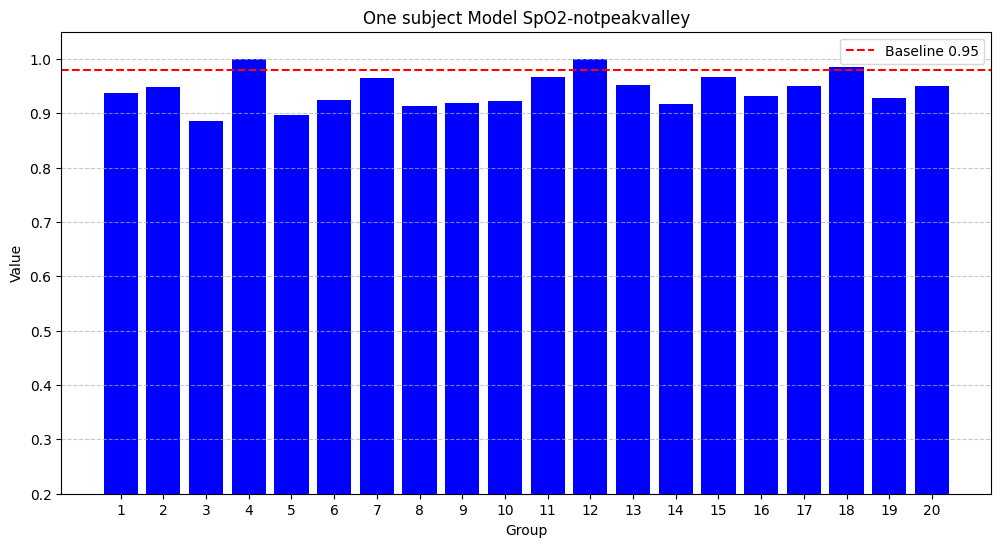

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Generating 20 groups of data fluctuating around 0.6 with a 10% margin
np.random.seed(1)  # For reproducibility
data_0_6 = 0.6 + 0.02 * np.random.randn(20)  # 10% of 0.6 is 0.06

# Generating 20 groups of data fluctuating around 0.95 with a 0.1 margin (not exceeding 1)
np.random.seed(2)  # For reproducibility
data_0_95 = np.clip(0.95 + 0.03 * np.random.randn(20), None, 1.0)  # Ensure values do not exceed 1

# Plotting the first bar chart (0.6)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 21), data_0_6, color='blue')
plt.axhline(y=0.6, color='r', linestyle='--', label='Baseline 0.6')
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Two subject Model-fetal SpO2')
plt.ylim(0.2, 0.7)
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Plotting the second bar chart (0.95)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 21), data_0_95, color='blue')
plt.axhline(y=0.98, color='r', linestyle='--', label='Baseline 0.95')
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('One subject Model SpO2-notpeakvalley')
plt.ylim(0.2, 1.05)
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


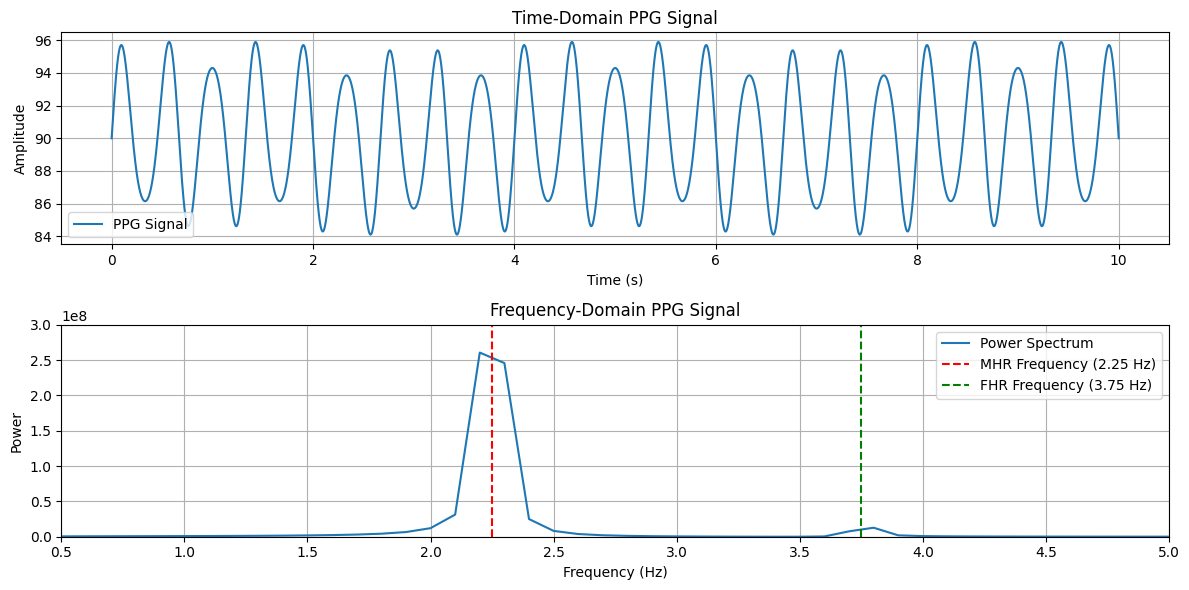

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency
t = np.linspace(0, 10, fs * 10)  # Time vector for 10 seconds

mhr_freq = 2.25  # MHR frequency in Hz
fhr_freq = 3.75  # FHR frequency in Hz
resp_freq = 0.25  # Respiration frequency in Hz

# Signals
mhr_signal = 5 * np.sin(2 * np.pi * mhr_freq * t)  # MHR signal
fhr_signal = 1 * np.sin(2 * np.pi * fhr_freq * t)  # FHR signal
resp_signal = 0.3 * np.sin(2 * np.pi * resp_freq * t)  # Respiration signal
dc_component = 90  # DC component

# PPG signal
ppg_signal = mhr_signal + fhr_signal + resp_signal + dc_component

# FFT of the PPG signal
n = len(t)
f = np.fft.fftfreq(n, 1/fs)
ppg_fft = np.fft.fft(ppg_signal)
power_spectrum = np.abs(ppg_fft) ** 2

# Plotting the time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ppg_signal, label='PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain PPG Signal')
plt.legend()
plt.grid()

# Plotting the frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(f[:n//2], power_spectrum[:n//2], label='Power Spectrum')
plt.xlim(0.5, 5)  # Limiting the x-axis to 0-5 Hz
plt.ylim(0, 3e8) 
plt.axvline(x=mhr_freq, color='r', linestyle='--', label='MHR Frequency (2.25 Hz)')
plt.axvline(x=fhr_freq, color='g', linestyle='--', label='FHR Frequency (3.75 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency-Domain PPG Signal')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
